DATASET INFO: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=bmw.csv

DATA : https://drive.google.com/file/d/1-6_6kiathX4Uu-9jH-2xPe3V0Zb8y2dB/view?usp=sharing

In [1]:
!gdown --id 1-6_6kiathX4Uu-9jH-2xPe3V0Zb8y2dB

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-6_6kiathX4Uu-9jH-2xPe3V0Zb8y2dB
To: /content/uk_used_cars.zip
100% 1.15M/1.15M [00:00<00:00, 66.4MB/s]


In [2]:
!unzip /content/uk_used_cars.zip -d /content/uk_used_cars

Archive:  /content/uk_used_cars.zip
  inflating: /content/uk_used_cars/audi.csv  
  inflating: /content/uk_used_cars/bmw.csv  
  inflating: /content/uk_used_cars/cclass.csv  
  inflating: /content/uk_used_cars/focus.csv  
  inflating: /content/uk_used_cars/ford.csv  
  inflating: /content/uk_used_cars/hyundi.csv  
  inflating: /content/uk_used_cars/merc.csv  
  inflating: /content/uk_used_cars/skoda.csv  
  inflating: /content/uk_used_cars/toyota.csv  
  inflating: /content/uk_used_cars/unclean cclass.csv  
  inflating: /content/uk_used_cars/unclean focus.csv  
  inflating: /content/uk_used_cars/vauxhall.csv  
  inflating: /content/uk_used_cars/vw.csv  


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/uk_used_cars/bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [5]:
df.shape

(10781, 9)

In [6]:
df.isna().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

**TRAIN AND TEST SAMPLES**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(df, random_state = 42)

In [9]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5
...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0


In [10]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5
...,...,...,...,...,...,...,...,...,...
9825,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0
3522,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0
9757,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0
6100,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0


##DATA EXPLORATION

In [11]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<Axes: >

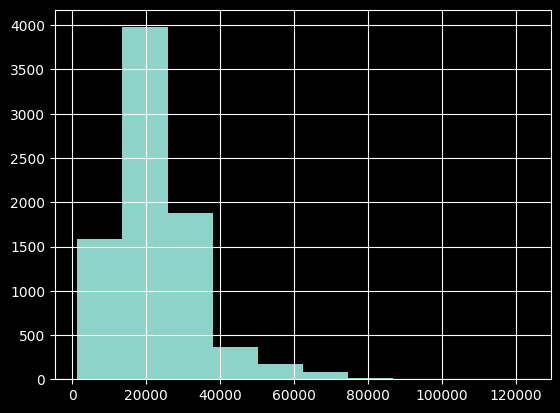

In [12]:
train.price.hist()

In [13]:
train['price'].describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

In [14]:
train.groupby(['year', 'price']).agg({'price':['count','mean','median']})

price                  
           count     mean   median
year price                        
1996 5995      1   5995.0   5995.0
1997 3950      1   3950.0   3950.0
1998 3950      1   3950.0   3950.0
1999 3950      1   3950.0   3950.0
     3995      2   3995.0   3995.0
...          ...      ...      ...
2020 77990     1  77990.0  77990.0
     77995     1  77995.0  77995.0
     78000     1  78000.0  78000.0
     79566     1  79566.0  79566.0
     79991     1  79991.0  79991.0

[4786 rows x 3 columns]

<Axes: xlabel='year'>

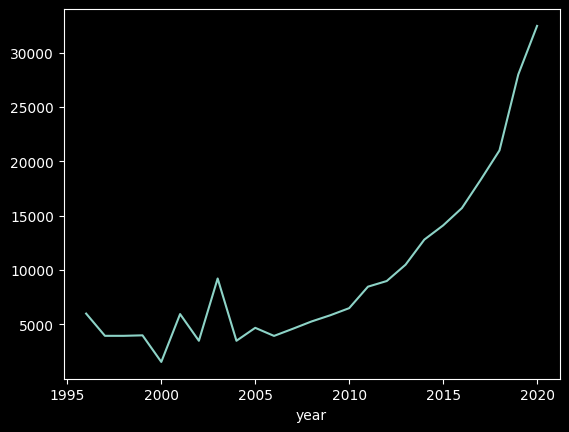

In [15]:
train.groupby('year')['price'].median().plot()

###BASELINE

In [16]:
train['price_pred_median'] = train.price.median()
train['median_pred_abs_error'] = abs(train.price_pred_median - train.price)
train['error_abs_pct'] = train.median_pred_abs_error/train.price
train['error_abs_pct'].mean()

0.41711111879393314

In [17]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [18]:
mean_absolute_error(train.price, train.price_pred_median)

8220.5146567718

In [19]:
mean_absolute_percentage_error(train.price, train.price_pred_median)

0.41711111879393314

In [20]:
test['price_pred_median'] = train['price'].median()

In [21]:
mean_absolute_error(test.price, test.price_pred_median)

8211.845697329376

In [22]:
mean_absolute_percentage_error(test.price, test.price_pred_median)

0.409212791738344

## Predictions

### Mean by year predictions

In [23]:
model_year_mean = train.groupby('year').price.agg('mean').reset_index()
model_year_mean.columns

Index(['year', 'price'], dtype='object')

In [24]:
model_year_mean.columns = ['year', 'price_pred_year_mean']

In [25]:
train = train.merge(model_year_mean, how = 'left', on = 'year')

In [26]:
mean_absolute_error(train.price, train.price_pred_year_mean)

5474.243598515644

In [27]:
mean_absolute_percentage_error(train.price, train.price_pred_year_mean)

0.2447228468704618

In [28]:
test = test.merge(model_year_mean, how = 'left', on = 'year')

In [29]:
mean_absolute_error(test.price, test.price_pred_year_mean)

5426.271071211102

In [30]:
mean_absolute_percentage_error(test.price, test.price_pred_year_mean)

0.23933940428873632

In [31]:
test.isna().any()

model                   False
year                    False
price                   False
transmission            False
mileage                 False
fuelType                False
tax                     False
mpg                     False
engineSize              False
price_pred_median       False
price_pred_year_mean    False
dtype: bool

###Median by year predictions

In [32]:
model_year_median = train.groupby('year').price.agg('median').reset_index()
model_year_median

,year,price
0,1996,5995.0
1,1997,3950.0
2,1998,3950.0
3,1999,3995.0
4,2000,1550.0
5,2001,5950.0
6,2002,3494.5
7,2003,9222.5
8,2004,3495.0
9,2005,4685.0


In [33]:
model_year_median.columns

Index(['year', 'price'], dtype='object')

In [34]:
model_year_median.columns = ['year', 'price_pred_year_median']

In [35]:
train = train.merge(model_year_median, how = 'left', on = 'year')

In [36]:
mean_absolute_error(train.price, train.price_pred_year_median)

5232.327891156463

In [37]:
mean_absolute_percentage_error(train.price, train.price_pred_year_median)

0.21723436816638503

In [38]:
test = test.merge(model_year_median, how = 'left', on = 'year')

In [39]:
mean_absolute_error(test.price, test.price_pred_year_median)

5240.677299703264

In [40]:
mean_absolute_percentage_error(test.price, test.price_pred_year_median)

0.21478293590399475

###Adding one more new feature

In [41]:
train.groupby('engineSize')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
engineSize,,,
0.0,32,18469.906250,18250.0
0.6,6,17973.333333,18200.0
1.0,1,17400.000000,17400.0
1.5,1146,17104.345550,15881.5
1.6,75,9230.240000,8890.0
1.9,5,3968.000000,3950.0
2.0,4925,20697.721624,19792.0
2.2,4,6010.000000,3972.5
2.5,8,4532.375000,3892.5


In [42]:
def engine_group(x):
  if x <= 1.5:
   return '<=1.5'
  if x <= 2:
    return '1.5 - 2'
  return '2+'

In [43]:
train.dtypes

model                      object
year                        int64
price                       int64
transmission               object
mileage                     int64
fuelType                   object
tax                         int64
mpg                       float64
engineSize                float64
price_pred_median         float64
median_pred_abs_error     float64
error_abs_pct             float64
price_pred_year_mean      float64
price_pred_year_median    float64
dtype: object

In [44]:
train['engine_group'] = train['engineSize'].apply(engine_group)

In [45]:
train.groupby('engine_group')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
engine_group,,,
1.5 - 2,5005,20509.168232,19499.0
2+,1895,31826.479683,27500.0
<=1.5,1185,17145.870886,15980.0


In [ ]:
model_year_engine_median = train.groupby(['year', 'engine_group']).price.agg('median').reset_index()
model_year_engine_median

In [47]:
train.groupby(['year', 'engine_group']).price.agg('count').reset_index()

,year,engine_group,price
0,1996,2+,1
1,1997,1.5 - 2,1
2,1998,1.5 - 2,1
3,1999,1.5 - 2,3
4,2000,2+,1
5,2001,2+,2
6,2001,<=1.5,1
7,2002,1.5 - 2,1
8,2002,2+,3
9,2003,2+,2


In [48]:
t = train.pivot_table(index='year', columns='engine_group', values = 'price', aggfunc = 'median')

In [49]:
import seaborn as sns

<Axes: xlabel='engine_group', ylabel='year'>

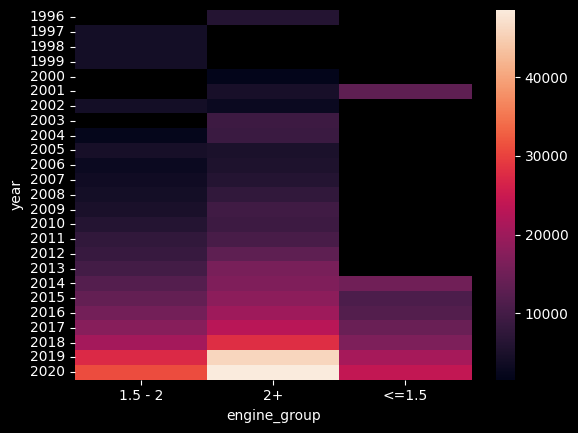

In [50]:
sns.heatmap(t)

In [51]:
model_year_engine_median = model_year_engine_median.rename({'price':'price_pred_year_engine_median'}, axis=1)

In [52]:
train = train.merge(model_year_engine_median, how = 'left', on=['year', 'engine_group'])

In [53]:
mean_absolute_error(train.price, train.price_pred_year_engine_median)

3659.774273345702

In [54]:
mean_absolute_percentage_error(train.price, train.price_pred_year_engine_median)

0.1582922021242831

In [57]:
test['engine_group'] = test['engineSize'].apply(engine_group)
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394,21000.0,<=1.5
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333,12797.5,1.5 - 2
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143,27980.0,2+
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143,27980.0,<=1.5
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394,21000.0,<=1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0,20022.0,31066.986143,27980.0,1.5 - 2
2692,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0,20022.0,31066.986143,27980.0,2+
2693,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0,20022.0,19205.839506,18299.5,1.5 - 2
2694,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0,20022.0,31066.986143,27980.0,1.5 - 2


In [64]:
test = test.merge(model_year_engine_median, how='left', on=['year','engine_group'])

In [60]:
test.isna().any()

model                     False
year                      False
price                     False
transmission              False
mileage                   False
fuelType                  False
tax                       False
mpg                       False
engineSize                False
price_pred_median         False
price_pred_year_mean      False
price_pred_year_median    False
engine_group              False
dtype: bool

In [65]:
def error(y_true, y_pred):
  return( mean_absolute_error(y_true, y_pred), mean_absolute_percentage_error(y_true, y_pred))

In [68]:
error(test.price, test.price_pred_year_median)

(5240.677299703264, 0.21478293590399475)

In [69]:
error(train.price, train.price_pred_year_median)

(5232.327891156463, 0.21723436816638503)

In [71]:
error(train.price, train.price_pred_year_engine_median)

(3659.774273345702, 0.1582922021242831)

In [73]:
test_no_na = test.dropna().copy()

In [74]:
error(test_no_na.price, test_no_na.price_pred_year_engine_median)

(3790.014291017075, 0.16270961023342095)

## Improving the model

In [75]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,median_pred_abs_error,error_abs_pct,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,20022.0,7231.0,0.565319,11041.347826,10490.0,1.5 - 2,9990.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,20022.0,3973.0,0.165576,31066.986143,27980.0,<=1.5,20980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,20022.0,5973.0,0.229775,15086.536313,14103.5,2+,18144.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,20022.0,4978.0,0.199120,31066.986143,27980.0,1.5 - 2,27294.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,20022.0,9072.0,0.828493,15086.536313,14103.5,<=1.5,10999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,20022.0,2027.0,0.112642,22562.450394,21000.0,1.5 - 2,20750.0
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,20022.0,72.0,0.003609,16531.655222,15699.5,2+,19996.5
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,20022.0,5428.0,0.213281,31066.986143,27980.0,1.5 - 2,27294.0
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,20022.0,172.0,0.008665,16531.655222,15699.5,1.5 - 2,15500.0


In [76]:
train.groupby('transmission')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
transmission,,,
Automatic,2698,22413.452187,19392.0
Manual,1925,14557.851429,13450.0
Semi-Auto,3462,27377.835066,24990.0


In [78]:
train.groupby('year')['price'].agg(['count'])

,count
year,
1996,1
1997,1
1998,1
1999,3
2000,1
2001,3
2002,4
2003,2
2004,7


In [120]:
train['year_group'] = pd.cut(train['year'], [0, 2010, 2012, 2014, 2016 , 2018, float('inf')])

In [121]:
train.groupby('year_group')['price'].agg(['count','median'])

,count,median
year_group,,
"(0.0, 2010.0]",124,5584.0
"(2010.0, 2012.0]",129,8985.0
"(2012.0, 2014.0]",637,11695.0
"(2014.0, 2016.0]",2114,15080.5
"(2016.0, 2018.0]",1931,19370.0
"(2018.0, inf]",3150,28867.5


In [122]:
train = train.drop(['price_pred_price_year_engine_group_median_x', \
                    'price_pred_price_year_engine_group_median_y'], axis = 1)

In [123]:
model_year_engine_group_median = train.groupby(['year_group', 'engine_group'])
                                        ['price'].median().reset_index()

In [124]:
model_year_engine_group_median = model_year_engine_group_median.rename({'price':'price_pred_year_engine_group_median'}, axis=1)

In [125]:
train = train.merge(model_year_engine_group_median, how='left', on=['year_group', 'engine_group'])

In [126]:
train.isna().any()

model                                        False
year                                         False
price                                        False
transmission                                 False
mileage                                      False
fuelType                                     False
tax                                          False
mpg                                          False
engineSize                                   False
price_pred_median                            False
median_pred_abs_error                        False
error_abs_pct                                False
price_pred_year_mean                         False
price_pred_year_median                       False
engine_group                                 False
price_pred_year_engine_median                False
year_group                                   False
price_pred_price_year_engine_group_median    False
price_pred_year_engine_group_median          False
dtype: bool

In [127]:
error(train['price'], train['price_pred_year_engine_group_median'])

(3827.4336425479282, 0.1693848259731495)

In [129]:
model_year_engine_group_trn_median = train.groupby(['year_group',
                                                    'engine_group',
                                                    'transmission'])\
                                          ['price'].median().reset_index()

In [130]:
model_year_engine_group_trn_median

,year_group,engine_group,transmission,price
0,"(0.0, 2010.0]",1.5 - 2,Automatic,5982.5
1,"(0.0, 2010.0]",1.5 - 2,Manual,3995.0
2,"(0.0, 2010.0]",1.5 - 2,Semi-Auto,5695.0
3,"(0.0, 2010.0]",2+,Automatic,5997.0
4,"(0.0, 2010.0]",2+,Manual,8800.0
5,"(0.0, 2010.0]",2+,Semi-Auto,10995.0
6,"(0.0, 2010.0]",<=1.5,Automatic,NaN
7,"(0.0, 2010.0]",<=1.5,Manual,13000.0
8,"(0.0, 2010.0]",<=1.5,Semi-Auto,NaN
9,"(2010.0, 2012.0]",1.5 - 2,Automatic,9440.0


In [133]:
model_year_engine_group_trn_median = model_year_engine_group_trn_median.rename({'price':'price_pred_year_engine_trm_group_median'}, axis=1)

In [135]:
train = train.merge(model_year_engine_group_trn_median,
            how='left',
            on=['year_group', 'engine_group', 'transmission'])

In [136]:
error(train['price'], train['price_pred_year_engine_group_median'])

(3827.4336425479282, 0.1693848259731495)

In [137]:
error(train['price'], train['price_pred_year_engine_trm_group_median'])

(3635.5412492269634, 0.1561691679065392)

In [138]:
test['year_group'] = pd.cut(test['year'], [0, 2010, 2012, 2014, 2016 , 2018, float('inf')])

In [140]:
test = test.merge(model_year_engine_group_trn_median,
            how='left',
            on=['year_group', 'engine_group', 'transmission'])

In [142]:
test.isna().mean()

model                                      0.000000
year                                       0.000000
price                                      0.000000
transmission                               0.000000
mileage                                    0.000000
fuelType                                   0.000000
tax                                        0.000000
mpg                                        0.000000
engineSize                                 0.000000
price_pred_median                          0.000000
price_pred_year_mean                       0.000000
price_pred_year_median                     0.000000
engine_group                               0.000000
price_pred_year_engine_median              0.000742
year_group                                 0.000000
price_pred_year_engine_trm_group_median    0.001113
dtype: float64

In [143]:
test_no_na = test.dropna().copy()

In [145]:
error(test_no_na['price'], test_no_na['price_pred_year_engine_trm_group_median'])

(3777.5172798216277, 0.16037327734163415)